# **Previsão da Sobrevivência de Pessoas com  Hepatite utilizando Naive Bayes**
---

Grupo B (AADEM):
- Alice Oliveira de Queiroz Brito (aoqb)
- Allan Soares Vasconcelos (asv)
- Dayane Lira da Silva (dls6)
- Enrique Laborão Monteiro (elm2)
- Maria Eduarda Souza Oliveira de Senna (mesos)



## **Bibliotecas**


As bibliotecas utilizadas para a **manipulação dos dados** foram:

- pandas
- numpy

Para a **visualização dos dados**:

- matplotlib
- IPython.core.display (display, HTML): usadas para visualização interativa da database.
- seaborn: usada para heatmap
- klib: usada para visualização de valores faltantes

Para separar os dados para **treino e teste do modelo**.
- sklearn.model_selection (train_test_split)

E para utilizar os **classificadores**:
- sklearn.naive_bayes: GaussianNB, CategoricalNB, BernoulliNB.

In [ ]:
pip install klib

In [ ]:
#Manipulação dos dados
import pandas as pd
import numpy as np

#Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
import klib

#Separação dos dados entre treino e teste
from sklearn.model_selection import train_test_split

#Classificadores
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB

## **Leitura dos dados**

Os dados utilizados estão disponíveis em: https://archive.ics.uci.edu/ml/datasets/Hepatitis. 

A leitura foi feita utilizando a biblioteca pandas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

raw_data = pd.read_csv("/content/drive/MyDrive/Projeto_Estatistica/hepatitis.data")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw_data.columns = ["CLASS","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE",
              "MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS",
              "ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"]

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLASS            154 non-null    int64 
 1   AGE              154 non-null    int64 
 2   SEX              154 non-null    int64 
 3   STEROID          154 non-null    object
 4   ANTIVIRALS       154 non-null    int64 
 5   FATIGUE          154 non-null    object
 6   MALAISE          154 non-null    object
 7   ANOREXIA         154 non-null    object
 8   LIVER BIG        154 non-null    object
 9   LIVER FIRM       154 non-null    object
 10  SPLEEN PALPABLE  154 non-null    object
 11  SPIDERS          154 non-null    object
 12  ASCITES          154 non-null    object
 13  VARICES          154 non-null    object
 14  BILIRUBIN        154 non-null    object
 15  ALK PHOSPHATE    154 non-null    object
 16  SGOT             154 non-null    object
 17  ALBUMIN          154 non-null    ob

In [ ]:
#Exibição dos valores por atributos.
for column in raw_data.columns:
  print(column,raw_data[column].unique())

CLASS [2 1]
AGE [50 78 31 34 51 23 39 30 32 41 47 38 66 40 22 27 42 25 49 58 61 62 26 35
 37 20 65 52 33 56 28 36 44 64 45 57 24 67 59 60 48 54  7 69 72 70 46 53
 43]
SEX [1 2]
STEROID ['1' '2' '?']
ANTIVIRALS [2 1]
FATIGUE ['1' '2' '?']
MALAISE ['2' '1' '?']
ANOREXIA ['2' '1' '?']
LIVER BIG ['1' '2' '?']
LIVER FIRM ['2' '1' '?']
SPLEEN PALPABLE ['2' '1' '?']
SPIDERS ['2' '1' '?']
ASCITES ['2' '1' '?']
VARICES ['2' '?' '1']
BILIRUBIN ['0.90' '0.70' '1.00' '?' '1.30' '2.20' '2.00' '1.20' '0.60' '0.40' '0.80'
 '1.40' '2.30' '0.50' '0.30' '4.60' '1.80' '3.50' '4.10' '1.60' '2.80'
 '1.50' '2.50' '3.00' '4.80' '2.40' '1.70' '1.10' '3.20' '2.90' '8.00'
 '3.90' '1.90' '4.20' '7.60']
ALK PHOSPHATE ['135' '96' '46' '?' '95' '78' '59' '81' '57' '72' '102' '62' '53' '70'
 '48' '133' '85' '60' '45' '175' '280' '58' '67' '194' '150' '180' '75'
 '56' '71' '74' '80' '191' '125' '110' '50' '92' '52' '26' '215' '164'
 '103' '34' '68' '82' '127' '76' '100' '55' '167' '30' '179' '141' '44'
 '165' '118' '

## **Análise exploratória dos dados**

Nessa seção é feita toda a análise exploratória e a limpeza dos dados.

### Análise de atributos faltantes

A database escolhida possui valores faltantes, então, antes do treinamento do modelo, é necessário realizar a limpeza dos dados.


Observou-se que os valores faltantes foram representados no dataset com o caractere '?', então esse valor será substituído por np.nan (not a number).

In [ ]:
#Convertendo '?' pra np.nan
raw_data = raw_data.replace('?',np.nan)

Em seguida, foi feito um plot para observar a **quantidade de valores faltantes por atributo**.

GridSpec(6, 6)

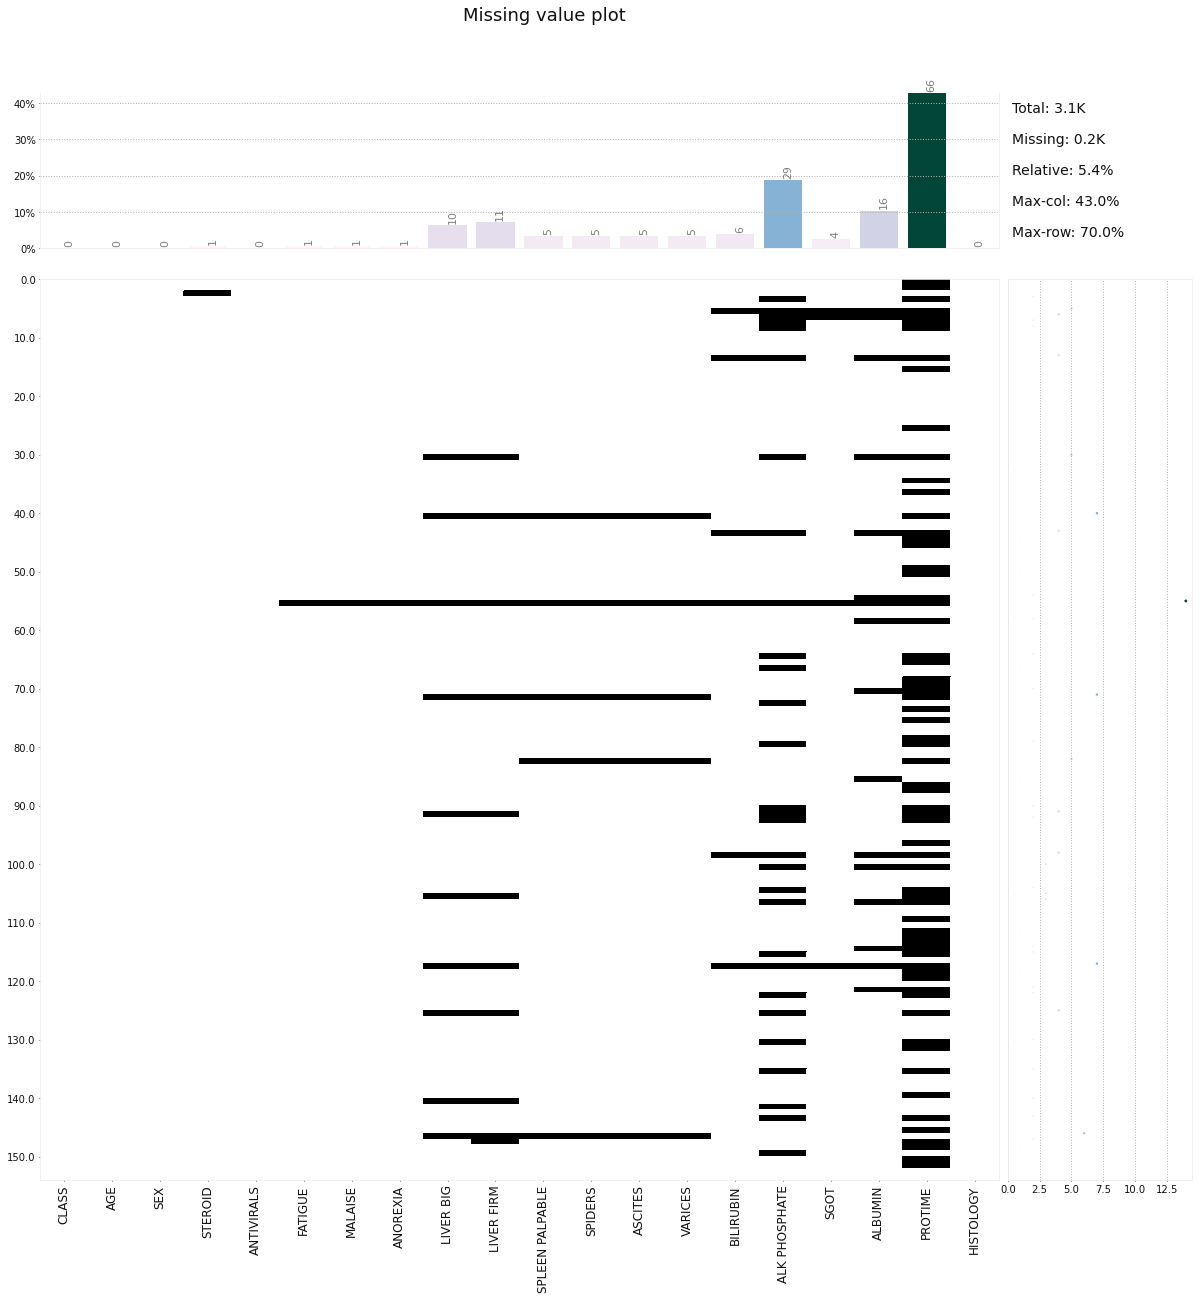

In [ ]:
klib.missingval_plot(raw_data)

#### Remoção de atributos
A partir do plot, observa-se que os atributos PROTIME e ALK PHOSPHATE tem muitos dados sem valor.

- PROTIME = 66 valores faltantes, corresponde a aproximadamente 43% de todos os dados.

- ALK PHOSPHATE = 29 valores faltantes, corresponde a aproximadamente 20% de todos os dados.

Vamos retirá-los da análise para não perdermos grande parte da database.

In [ ]:
#Remoção dos atributos PROTIME e ALK PHOSPHATE.
raw_data.drop(columns=["PROTIME","ALK PHOSPHATE"],inplace=True)

Após a remoção, observa-se que o atributo com mais valores faltantes corresponde a aproximadamente 10% da quantidade total de instâncias, não sendo necessária a sua remoção.

GridSpec(6, 6)

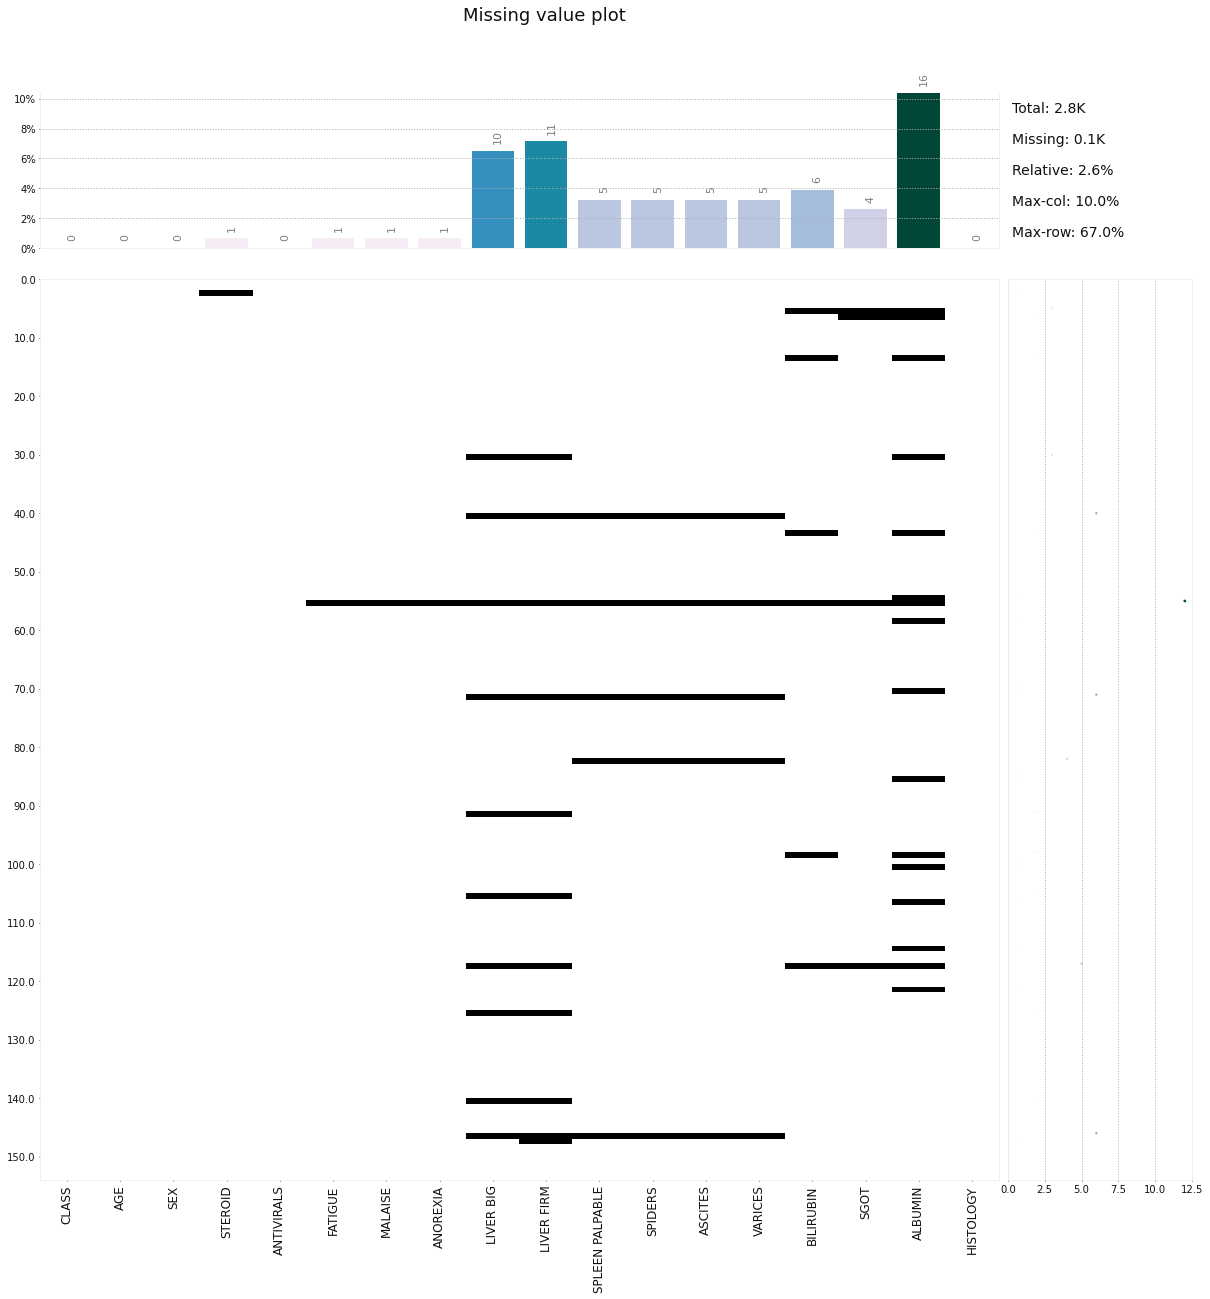

In [ ]:
#Visualização dos dados faltantes após a remoção.
klib.missingval_plot(raw_data)

### Remoção de instâncias que possuem valores faltantes

Em seguida, são removidas todas as instâncias que ainda contém os valores faltantes.

In [ ]:
#Retirando valores nan.
raw_data.dropna(inplace=True)

Após o descarte das instâncias incompletas, restam 128 instâncias para treinar o modelo.

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 153
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLASS            128 non-null    int64 
 1   AGE              128 non-null    int64 
 2   SEX              128 non-null    int64 
 3   STEROID          128 non-null    object
 4   ANTIVIRALS       128 non-null    int64 
 5   FATIGUE          128 non-null    object
 6   MALAISE          128 non-null    object
 7   ANOREXIA         128 non-null    object
 8   LIVER BIG        128 non-null    object
 9   LIVER FIRM       128 non-null    object
 10  SPLEEN PALPABLE  128 non-null    object
 11  SPIDERS          128 non-null    object
 12  ASCITES          128 non-null    object
 13  VARICES          128 non-null    object
 14  BILIRUBIN        128 non-null    object
 15  SGOT             128 non-null    object
 16  ALBUMIN          128 non-null    object
 17  HISTOLOGY        128 non-null    in

### Padronização dos tipos dos dados

Nessa seção é dada continuidade a limpeza dos dados.

- Como todos os valores dos atributos são números, é feita a conversão de String para um tipo numérico.

- As categorias binárias na database eram 1 e 2, serão modificadas para 0 e 1.

In [ ]:
clean_data = raw_data.copy(deep=True)

#Trocando de string para numero.
for column in clean_data.columns:
  clean_data[column] = pd.to_numeric(clean_data[column])

In [ ]:
#Trocando categorias binárias para 0 e 1.
for column in clean_data.columns:
  uniques = clean_data[column].unique()
  if len(uniques) == 2:
    clean_data[column] = clean_data[column].map({1: 0, 2: 1}).astype(int)

In [ ]:
#Dados após as modificações.
for column in clean_data.columns:
  print(column,clean_data[column].unique())

CLASS [1 0]
AGE [50 78 34 39 30 32 41 38 66 40 22 27 31 42 25 49 58 61 51 26 35 37 23 20
 65 52 33 56 28 36 44 64 57 24 62 59 47 48 54  7 45 72 46 53 43]
SEX [0 1]
STEROID [0 1]
ANTIVIRALS [1 0]
FATIGUE [0 1]
MALAISE [1 0]
ANOREXIA [1 0]
LIVER BIG [0 1]
LIVER FIRM [1 0]
SPLEEN PALPABLE [1 0]
SPIDERS [1 0]
ASCITES [1 0]
VARICES [1 0]
BILIRUBIN [0.9 0.7 1.  1.3 2.2 2.  1.2 0.6 0.4 0.8 1.4 2.3 0.5 0.3 1.8 3.5 4.1 1.6
 1.5 2.5 4.6 3.  4.8 2.4 1.7 1.1 3.2 2.9 2.8 8.  1.9 4.2 7.6]
SGOT [ 42  32 200  28  48 120  30 249  60 144  89  53 166  20  98  63  18  46
  55  25  58  29  92 150  68  14  90 110  80 420  44  65 145  31  78  38
  64  54  43  33  15  39  45 100 242  24 224 156 123  16 117  69 157 128
  23 227 269  34 225  75  81 153 118 231 101 278  52  49 181 140  70 114
 173 142  19]
ALBUMIN [3.5 4.  4.4 3.9 3.7 4.9 2.9 4.3 4.1 4.2 4.7 3.8 2.7 4.6 5.  3.3 4.5 3.4
 3.1 3.  2.6 5.3 4.8 2.8 3.6 2.1 6.4 2.4 2.2]
HISTOLOGY [0 1]


### Análise da correlação entre atributos

Como o classificador ingênuo de Bayes considera que os atributos são independentes entre si, é necessário observar se essa condição é respeitada entre os atributos da base utilizada.

Serão analisados os coeficientes de correlação dos atributos, que serão plotados em um mapa de calor.

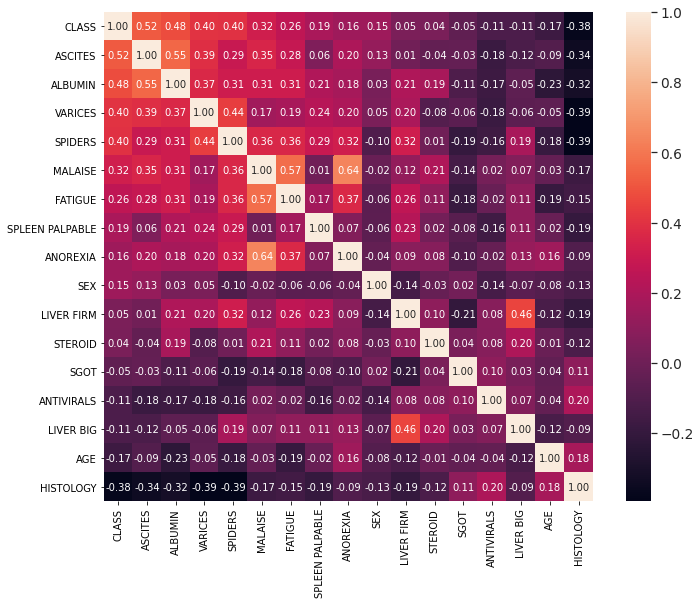

In [ ]:
#Computacao dos valores de correlacao entre os atributos.
corrmat = clean_data.corr()
f, ax = plt.subplots(figsize=(12, 9))

#Numero de variaveis para o mapa de calor
k = len(clean_data.columns)-1

#Atributos ordenados pela correlacao com a classe
cols = corrmat.nlargest(k, 'CLASS')['CLASS'].index
#Coeficientes de correlação com a matriz transposta
cm = np.corrcoef(clean_data[cols].values.T)

#Plot
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Foi analisado o módulo das correlações e os seguintes atributos se destacam com fortes e moderadas correlações (acima de 0.3):

Atributo - quantidade de correlações acima de 0.3:
- **Ascites** - 5
- **Albumin** - 7
- **Varices** - 5
- **Spiders** - 8
- **Malaise** - 6
- Fatigue - 4
- Anorexia - 3
- Liver firm - 2
- Liver big - 1
- **Histology** - 5
- Outros - 0

#### Remoção dos atributos

Como temos alta correlação entre alguns dos atributos, iremos dropa-los para manter condição de independência dos mesmos. 

Empiricamente, essa modificação melhorou a acurácia dos modelos categóricos e combinados em aproximadamente 2%, embora tenha diminuído a do modelo puramente gaussiano em aproximadamente 10%.

In [ ]:
clean_data.drop(columns=["ALBUMIN","MALAISE","LIVER BIG","HISTOLOGY","SPIDERS"],inplace=True)

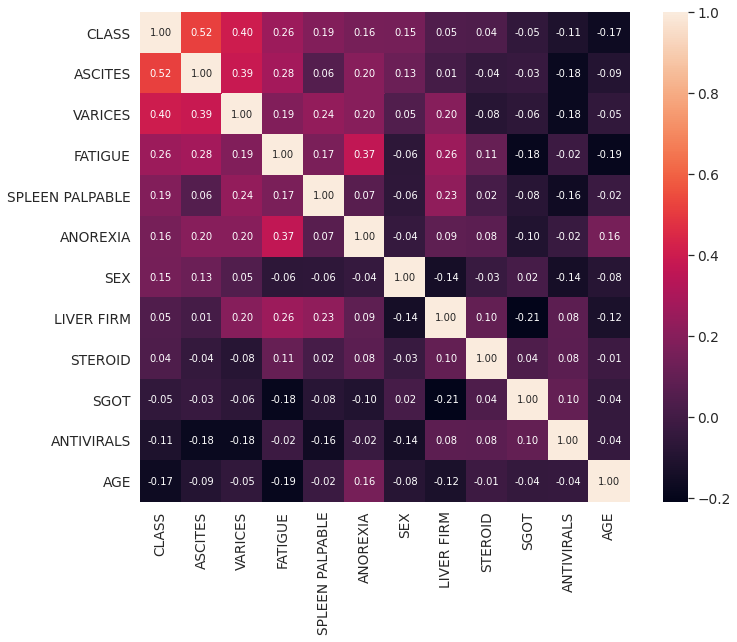

In [ ]:
corrmat = clean_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = len(clean_data.columns)-1 #number of variables for heatmap
cols = corrmat.nlargest(k, 'CLASS')['CLASS'].index
cm = np.corrcoef(clean_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## **Visualização dos dados após tratamento**

Nessa seção temos uma visualização interativa dos dados limpos.

In [ ]:
Quantidade_de_pessoas =  110#@param
  
train_dive = clean_data.sample(Quantidade_de_pessoas).to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=train_dive)
display(HTML(html))

##**Treinamento do modelo**

Nessa seção é feito o treinamento e medição de acurácia do classificador de Bayes, serão utilizados diferentes algoritmos para o classificador: GaussianNB, CategoricalNB, BernoulliNB.

Segundo [7] e [8], para as variáveis numéricas devemos usar GaussianNB e para atributos categóricos CategoricalNB, como os categóricos são binários também podemos usar BernoulliNB.

Os modelos utilizados foram:
- Modelo 1: Apenas classificador gaussiano
- Modelo 2: Classificadores gaussiano e categórico
- Modelo 3: Apenas classificador categórico
- Modelo 4: Classificadores gaussiano e de bernoulli


---



Primeiramente, os dados foram divididos de forma que 80% deles sejam usados para o treinamento e 20% para os testes.

In [ ]:
#Separando os dados para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(clean_data.drop(columns=["CLASS"]),clean_data["CLASS"], test_size=0.2)

In [ ]:
#Separando atributos categóricos e numéricos.
categorical_columns = [column for column in X_test.columns if len(X_test[column].unique())==2 ]
numerical_columns = [column for column in X_test.columns if column not in categorical_columns]
categorical_columns,numerical_columns

(['SEX',
  'STEROID',
  'ANTIVIRALS',
  'FATIGUE',
  'ANOREXIA',
  'LIVER FIRM',
  'SPLEEN PALPABLE',
  'ASCITES',
  'VARICES'],
 ['AGE', 'BILIRUBIN', 'SGOT'])

###GaussianNB

Usando apenas o classificador Gaussiano.

In [ ]:
#Instanciando o classificador Gaussiano
gaussian_1 = GaussianNB()

#Método fit é responsável por treinar o modelo
gaussian_1.fit(X_train.values,y_train)

#Acurácia do modelo
acc_model_1 = gaussian_1.score(X_test,y_test)

print("Acurácia modelo 1: {:03.2f}%".format(acc_model_1))

def just_gauss(X_train, y_train):
  gaussian = GaussianNB()
  gaussian.fit(X_train.values,y_train)

  return gaussian.score

Acurácia modelo 1: 0.46%


###GaussianNB e CategoricalNB

Usando o classificador gaussiano e categórico.

In [ ]:
#Instanciando os classificadores
gaussian_2 = GaussianNB()
categorical_2 = CategoricalNB()

#Treinando o classificador gaussiano com os valores numéricos.
gaussian_2.fit(X_train[numerical_columns].values,y_train)
#Treinando o classificador categórico com os valores categóricos.
categorical_2.fit(X_train[categorical_columns].values,y_train)

#Já que apenas nos preocupamos com a previsão do modelo, e não com as
#probabilidades em si, multiplicar as probabilidades diretamente gera o mesmo 
#resultado que unirmos as likelihoods devido a função argmax.
prob_gauss_2 = gaussian_2.predict_proba(X_test[numerical_columns])
prob_cat_2 = categorical_2.predict_proba(X_test[categorical_columns])

final_prob_2 = prob_gauss_2*prob_cat_2

#Previsões
y_pred_2 = np.argmax(final_prob_2,axis=1)

#Calculando acurácia do modelo.
acc_model_2 = 1-(y_test != y_pred_2).sum()/len(y_test)

print("Acurácia modelo 2: {:03.2f}%".format(acc_model_2))

def gauss_and_cat(X_train,y_train):
  gaussian = GaussianNB()
  categorical = CategoricalNB()

  gaussian.fit(X_train[numerical_columns].values,y_train)
  categorical.fit(X_train[categorical_columns].values,y_train)

  def score(X_test,y_test):
    prob_gauss = gaussian.predict_proba(X_test[numerical_columns])
    prob_cat = categorical.predict_proba(X_test[categorical_columns])

    final_prob = prob_gauss*prob_cat

    y_pred = np.argmax(final_prob,axis=1)

    acc_model = 1-(y_test != y_pred).sum()/len(y_test)
    return acc_model

  return score

Acurácia modelo 2: 0.73%


###CategoricalNB

Utilizando apenas o classificador categórico, para isso os atributos numéricos foram transformados em categóricos a partir da média.

In [ ]:
#Instanciando classificador categórico
categorical_3 = CategoricalNB()

#Aqui transformamos os atributos numéricos em categóricos a partir da média
X_train_3 = X_train.copy(deep=True)
X_test_3 = X_test.copy(deep=True)

X_train_3[numerical_columns] = (X_train_3[numerical_columns]>X_train_3[numerical_columns].mean(axis=0)).astype(int)
X_test_3[numerical_columns] = (X_test_3[numerical_columns]>X_test_3[numerical_columns].mean(axis=0)).astype(int)

#Treinando o modelo
categorical_3.fit(X_train_3.values,y_train)

#Acurácia do modelo
acc_model_3 = categorical_3.score(X_test_3,y_test)

print("Acurácia modelo 3: {:03.2f}%".format(acc_model_3))

def just_cat(X_train,y_train):
  categorical = CategoricalNB()

  X_train_3 = X_train.copy(deep=True)
  X_test_3 = X_test.copy(deep=True)

  X_train_3[numerical_columns] = (X_train_3[numerical_columns]>X_train_3[numerical_columns].mean(axis=0)).astype(int)

  categorical.fit(X_train.values,y_train)

  def score(X_test,y_test):
      
    X_test_3 = X_test.copy(deep=True)

    X_test_3[numerical_columns] = (X_test_3[numerical_columns]>X_test_3[numerical_columns].mean(axis=0)).astype(int)
    return categorical.score(X_test_3,y_test)

  return score

Acurácia modelo 3: 0.73%


###GaussianNB e BernoulliNB

Como mencionado, é possível usar o algoritmo de Bernoulli visto que os atributos categóricos são todos binários.

In [ ]:
#Instanciando os classificadores.
gaussian_4 = GaussianNB()
bernoulli_4 = BernoulliNB()

#Treinando o classificador gaussiano com os valores numéricos.
gaussian_4.fit(X_train[numerical_columns].values,y_train)
#Treinando o classificador de bernoulli com os valores categóricos.
bernoulli_4.fit(X_train[categorical_columns].values,y_train)

#Já que apenas nos preocupamos com a previsão do modelo, e não com as
#probabilidades em si,multiplicar as probabilidades diretamente gera o mesmo 
#resultado que unirmos as likelihoods devido a função argmax.
prob_gauss_4 = gaussian_4.predict_proba(X_test[numerical_columns])
prob_ber_4 = bernoulli_4.predict_proba(X_test[categorical_columns])

final_prob_4 = prob_gauss_4*prob_ber_4

#Previsões
y_pred_4 = np.argmax(final_prob_2,axis=1)

#Acurácia
acc_model_4 = 100*(1-(y_test != y_pred_2).sum()/len(y_test))

print("Acurácia modelo 4: {:03.2f}%".format(acc_model_2))

def gauss_and_ber(X_train,y_train):
  gaussian = GaussianNB()
  bernoulli = BernoulliNB()

  gaussian.fit(X_train[numerical_columns].values,y_train)
  bernoulli.fit(X_train[categorical_columns].values,y_train)

  def score(X_test,y_test):
    prob_gauss = gaussian.predict_proba(X_test[numerical_columns])
    prob_ber = bernoulli.predict_proba(X_test[categorical_columns])

    final_prob = prob_gauss*prob_ber

    y_pred = np.argmax(final_prob,axis=1)

    acc_model = 1-(y_test != y_pred).sum()/len(y_test)
    return acc_model

  return score

Acurácia modelo 4: 0.73%


###Comparação entre os modelos

Nessa seção, validamos qual modelo possui melhor performance através de vários trials (500).

Para calcular a performance, foi feita uma média da acurácia dos modelos utilizados em cada trial.

In [ ]:
model_1_perf = []
model_2_perf = []
model_3_perf = []
model_4_perf = []
for i in range(500):
  X_train, X_test, y_train, y_test = train_test_split(clean_data.drop(columns=["CLASS"]),clean_data["CLASS"], test_size=0.2)
  #Treinando os modelos
  model_1 = just_gauss(X_train,y_train)
  model_2 = gauss_and_cat(X_train,y_train)
  model_3 = just_cat(X_train,y_train)
  model_4 = gauss_and_ber(X_train,y_train)
  #Testando os modelos
  model_1_perf = np.append(model_1_perf,model_1(X_test,y_test))
  model_2_perf = np.append(model_2_perf,model_2(X_test,y_test))
  model_3_perf = np.append(model_3_perf,model_3(X_test,y_test))
  model_4_perf = np.append(model_4_perf,model_4(X_test,y_test))

print("Model 1 performance:",model_1_perf.mean(),"Stdev: ",model_1_perf.std())
print("Model 2 performance:",model_2_perf.mean(),"Stdev: ",model_2_perf.std())
print("Model 3 performance:",model_3_perf.mean(),"Stdev: ",model_3_perf.std())
print("Model 4 performance:",model_4_perf.mean(),"Stdev: ",model_4_perf.std())


Model 1 performance: 0.6776153846153845 Stdev:  0.08960858343290598
Model 2 performance: 0.8656923076923078 Stdev:  0.05970757140296562
Model 3 performance: 0.8434615384615386 Stdev:  0.06537443359637878
Model 4 performance: 0.8656923076923078 Stdev:  0.05970757140296562


Através dos dados acima, podemos concluir que os modelos com o classificador gaussiano para os atributos numéricos e os classificadores categórico e de bernoulli são os de maior acurácia.

Os modelos 2 e 4 possuem acurácia igual a aproximadamente 86.57%, seguidos do modelo 3 com 84.35% e modelo 1 com performance igual a 67.76%.

##**Testes**

Após estabelecer o modelo 2 ou 4 como os melhores, realizamos dois testes com o modelo 2.

Teste 1:
- Pessoa com **61** anos, sexo **masculino**, **sem uso** de esteroides e **uso** de antivirais, apresentando **anorexia**, **baço palpável**, **ascite** e **varizes**, bilirrubina=**0.8** e sgot=**20**.

Teste 2:
- Pessoa com **57** anos, sexo **masculino**, **com uso** de esteroides e antivirais, apresentando **fígado firme**, **baço palpável** e **varizes**, bilirrubina=**4.1** e sgot=**48**.

O resultado obtido para o teste 1 foi LIVE e para o teste 2 foi DIE.

In [ ]:
#AGE, SEX, STEROID, ANTIVIRALS, FATIGUE, ANOREXIA, LIVER FIRM, SPLEEN PALPABLE, ASCITES, VARICES, BILIRUBIN, SGOT
teste1 = [[61, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0.8, 20]]
teste2 = [[57, 0, 1, 1, 0, 0, 1, 1, 0, 1, 4.1, 48]]

testes_categorical = [[0, 0, 1, 0, 1, 0, 1, 1, 1], [0, 1, 1, 0, 0, 1, 1, 0, 1]]
testes_numerical = [[61, 0.8, 20], [57, 4.1, 48]]

prob_gauss_2 = gaussian_2.predict_proba(testes_numerical)
prob_cat_2 = categorical_2.predict_proba(testes_categorical)

final_prob_2 = prob_gauss_2*prob_cat_2

# Esperado 1 e 0.
print(np.argmax(final_prob_2,axis=1))

##**Referências**
----

[1] M. Paul, ``Probabilidade: Aplicações à Estatística''. 2 Edição. livros Técnicos e Científicos Editora.

[2] https://en.wikipedia.org/wiki/Bayes'\_theorem

[3] https://www.sciencedirect.com/topics/engineering/bayes-theorem

[4] https://www.3blue1brown.com/videos-blog/bayes-theorem-and-making-probability-intuitive

[5] Gong, G. Carnegie-Mellon University. 1988. UCI Machine Learning Repository: Hepatitis. [https://archive.ics.uci.edu/ml/datasets/Hepatitis]. 

[6] https://medium.com/turing-talks/turing-talks-16-modelo-de-predição-naive-bayes-6a3e744e7986

[7] https://towardsdatascience.com/how-i-was-using-naive-bayes-incorrectly-till-now-part-1-4ed2a7e2212b

[8] https://medium.com/analytics-vidhya/naive-bayes-for-mixed-typed-data-in-scikit-learn-fb6843e241f0